In [1]:
import numpy as np
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
penguins = penguins.dropna()

In [7]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
penguins.shape

(333, 7)

In [16]:
penguins.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_num
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male,0
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,Female,1
284,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,Female,1
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male,0
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female,1
78,Adelie,Torgersen,36.2,16.1,187.0,3550.0,Female,1
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,Male,0
259,Gentoo,Biscoe,48.7,15.7,208.0,5350.0,Male,0
136,Adelie,Dream,35.6,17.5,191.0,3175.0,Female,1
312,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,Female,1


In [10]:
mapping = {'Male': 0, 'Female': 1}

penguins['sex_num'] = penguins['sex'].map(mapping)

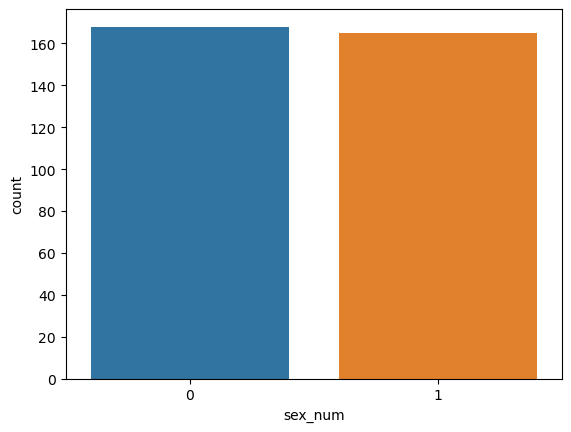

In [17]:
# (1) frequency distribution via a barplot
sns.countplot(data=penguins, x='sex_num');

In [12]:
penguins[penguins["sex"]== "Male"].count()

species              168
island               168
bill_length_mm       168
bill_depth_mm        168
flipper_length_mm    168
body_mass_g          168
sex                  168
sex_num              168
dtype: int64

In [13]:
penguins[penguins["sex"]== "Female"].count()

species              165
island               165
bill_length_mm       165
bill_depth_mm        165
flipper_length_mm    165
body_mass_g          165
sex                  165
sex_num              165
dtype: int64

In [15]:
# (2) frequency distribution table
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [22]:
# (3) relative frequency distribution (0-1)
penguins['sex'].value_counts(normalize=True)

Male      0.504505
Female    0.495495
Name: sex, dtype: float64

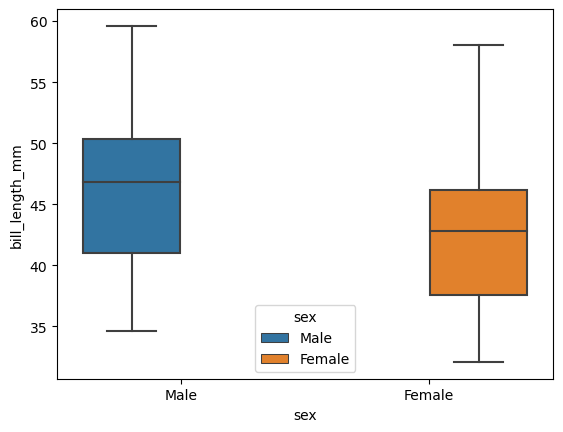

In [26]:
# the distribution of Glucose conditioned on Outcome
sns.boxplot(data=penguins, x='sex', y='bill_length_mm', hue='sex');

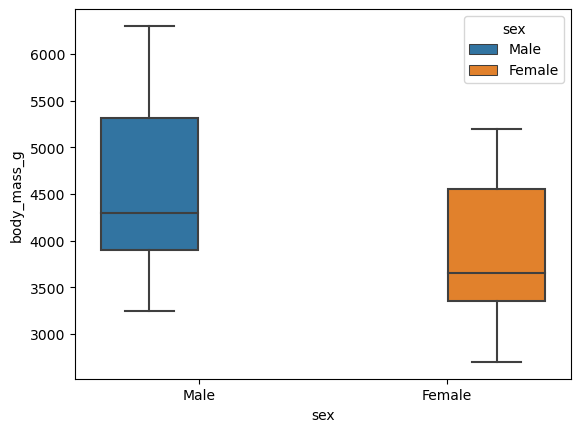

In [27]:
# same as above, but missing values (0s) excluded
sns.boxplot(data=penguins.query('body_mass_g>0'), x='sex', y='body_mass_g', hue='sex');

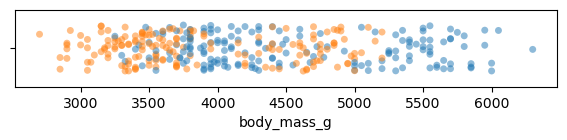

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,1))
sns.stripplot(
    data=penguins, x='body_mass_g', hue='sex', 
    jitter=0.3, alpha=0.5, legend=False, ax=ax
);

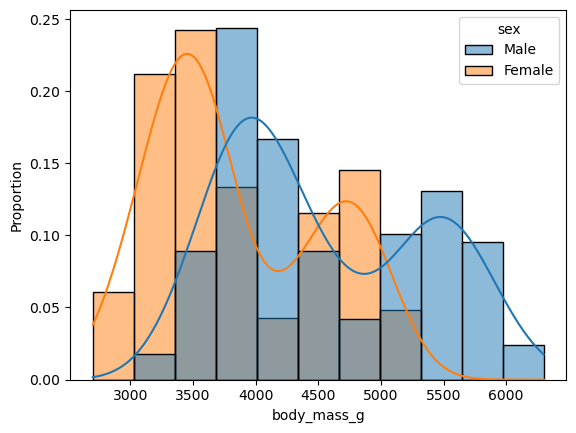

In [29]:
# a histogram; one KDE for each group
sns.histplot(
    data=penguins, x='body_mass_g', hue='sex', 
    kde=True, common_norm=False, stat='proportion'
);

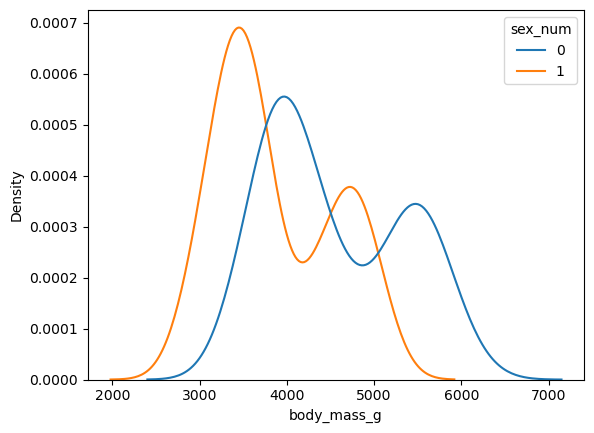

In [19]:
# if one doesn't want the superimposition on a histogram...
sns.kdeplot(
    data=penguins, x='body_mass_g', hue='sex_num', 
    common_norm=False
);